# Домашнее задание

В этом домашнем задании вы обучите полносвязную нейронную сеть для решения задачи классификации на датасете CIFAR-10.

Это домашнее задание оформлено в не совсем традиционном формате. Не хочется заставлять вас копировать код. Вы будете менять уже существующую архитектуру, а затем отвечать на вопросы.

## Задание 1

Запустите данный изначально код и замерьте качество (accuracy) на тестовых данных. Ответ округлите до целого числа.

## Задание 2

Добавьте еще один полносвязный слой (перед выходным) из 100 нейронов + функцию активации ReLU и запустите обучение. Выберите в ответе accuracy, наиболее близкую к полученной на тесте.

## Задание 3

Теперь обучите полносвязную сеть с несколькими линейными слоями с числом нейронов: 1024, 512, 256, 128, 64 соответственно + функцией ReLU на выходе из каждого внутреннего слоя. В ответе - accuracy, округленная до целого числа.

## Задание 4

К архитектуре из предыдущего задания добавьте Dropout(0.2) перед слоями из 1024 и 256 нейронов. Увеличилась ли accuracy по сравнению с предыдущим заданием?

## Задание 5

Уберите Dropout, но добавьте BatchNorm перед входом в те же линейные слои. Увеличилась ли accuracy по сравнению с заданием 3?

## Задание 6

Теперь пробуйте что угодно:
* разное число линейных слоев
* разные функции активации (вместо ReLU)
* комбинации Dropout / BatchNorm
* можете попробовать умные инициализации весов и другие трюки из урока

Цель - добиться наибольшей accuracy на тесте.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np

def seed():
  np.random.seed(0)
  random.seed(0)
  torch.manual_seed(0)

seed()

In [2]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Hyper-parameters
input_size = 3072
num_classes = 10
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [4]:
# MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                          train=False,
                                          transform=transform)

100%|██████████| 170M/170M [00:28<00:00, 5.91MB/s] 


Extracting ../../data\cifar-10-python.tar.gz to ../../data


In [5]:
# Data loader
seed()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [6]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        seed()
        self.fc1 = nn.Linear(input_size, 1000)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1000, num_classes)
#        self.apply(self._init_weights)

    def _init_weights(self, module): # метод для различных "умных" инициализаций весов
        seed()
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=0.15)
            if module.bias is not None:
                module.bias.data.zero_()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, num_classes).to(device)

In [7]:
model

NeuralNet(
  (fc1): Linear(in_features=3072, out_features=1000, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)

In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
seed()

loss_log = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            loss_log.append(loss.data.cpu().numpy())

Epoch [1/10], Step [100/1563], Loss: 2.3562
Epoch [1/10], Step [200/1563], Loss: 2.2064
Epoch [1/10], Step [300/1563], Loss: 1.6601
Epoch [1/10], Step [400/1563], Loss: 1.7257
Epoch [1/10], Step [500/1563], Loss: 2.1267
Epoch [1/10], Step [600/1563], Loss: 2.0310
Epoch [1/10], Step [700/1563], Loss: 1.6544
Epoch [1/10], Step [800/1563], Loss: 1.6545
Epoch [1/10], Step [900/1563], Loss: 1.6880
Epoch [1/10], Step [1000/1563], Loss: 1.3196
Epoch [1/10], Step [1100/1563], Loss: 1.6887
Epoch [1/10], Step [1200/1563], Loss: 1.6063
Epoch [1/10], Step [1300/1563], Loss: 1.8398
Epoch [1/10], Step [1400/1563], Loss: 1.4904
Epoch [1/10], Step [1500/1563], Loss: 1.6322
Epoch [2/10], Step [100/1563], Loss: 1.4655
Epoch [2/10], Step [200/1563], Loss: 1.5365
Epoch [2/10], Step [300/1563], Loss: 1.7468
Epoch [2/10], Step [400/1563], Loss: 1.6173
Epoch [2/10], Step [500/1563], Loss: 1.8564
Epoch [2/10], Step [600/1563], Loss: 1.4594
Epoch [2/10], Step [700/1563], Loss: 1.5056
Epoch [2/10], Step [800/15

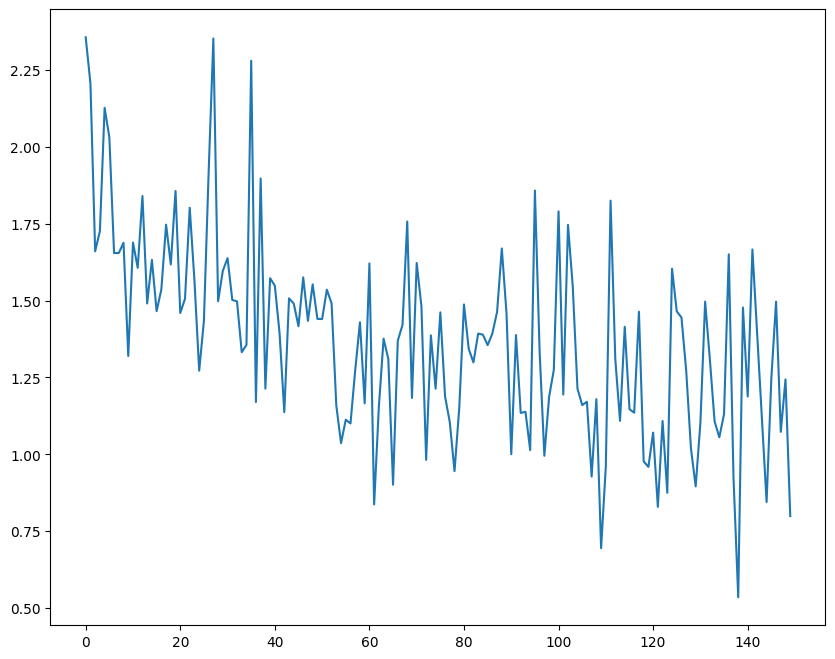

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(loss_log)

In [11]:
seed()

# Test the model
# In the test phase, don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the test images: 48.91 %


In [12]:
def train_model(model: nn.Module):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Move tensors to the configured device
            images = images.reshape(-1, 32*32*3).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backprpagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                loss_log.append(loss.data.cpu().numpy())
                
    return loss_log

In [13]:
def test_model(model: nn.Module):
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 32*32*3).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))
                

In [14]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        seed()
        self.fc1 = nn.Linear(input_size, 1000)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1000, 100)
        self.relu2 = nn.ReLU()
        self.head = nn.Linear(100, num_classes)
#        self.apply(self._init_weights)

    def _init_weights(self, module): # метод для различных "умных" инициализаций весов
        seed()
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=0.15)
            if module.bias is not None:
                module.bias.data.zero_()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.head(out)
        return out

model = NeuralNet(input_size, num_classes).to(device)

train_model(model)
test_model(model)

Epoch [1/10], Step [100/1563], Loss: 1.7789
Epoch [1/10], Step [200/1563], Loss: 1.7640
Epoch [1/10], Step [300/1563], Loss: 1.8456
Epoch [1/10], Step [400/1563], Loss: 1.9120
Epoch [1/10], Step [500/1563], Loss: 1.4804
Epoch [1/10], Step [600/1563], Loss: 1.8054
Epoch [1/10], Step [700/1563], Loss: 1.6883
Epoch [1/10], Step [800/1563], Loss: 1.3647
Epoch [1/10], Step [900/1563], Loss: 1.6570
Epoch [1/10], Step [1000/1563], Loss: 1.8116
Epoch [1/10], Step [1100/1563], Loss: 1.6818
Epoch [1/10], Step [1200/1563], Loss: 1.4581
Epoch [1/10], Step [1300/1563], Loss: 1.6568
Epoch [1/10], Step [1400/1563], Loss: 1.4539
Epoch [1/10], Step [1500/1563], Loss: 1.3470
Epoch [2/10], Step [100/1563], Loss: 1.6198
Epoch [2/10], Step [200/1563], Loss: 1.2795
Epoch [2/10], Step [300/1563], Loss: 1.5004
Epoch [2/10], Step [400/1563], Loss: 1.5182
Epoch [2/10], Step [500/1563], Loss: 1.6010
Epoch [2/10], Step [600/1563], Loss: 1.6787
Epoch [2/10], Step [700/1563], Loss: 1.5350
Epoch [2/10], Step [800/15

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.layers(x)
    
    
model = NeuralNet(input_size, num_classes).to(device)
train_model(model)
test_model(model)

In [15]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.layers(x)
    
    
model = NeuralNet(input_size, num_classes).to(device)
train_model(model)
test_model(model)

Epoch [1/10], Step [100/1563], Loss: 2.0247
Epoch [1/10], Step [200/1563], Loss: 1.9667
Epoch [1/10], Step [300/1563], Loss: 2.0224
Epoch [1/10], Step [400/1563], Loss: 1.7540
Epoch [1/10], Step [500/1563], Loss: 1.6684
Epoch [1/10], Step [600/1563], Loss: 1.7489
Epoch [1/10], Step [700/1563], Loss: 1.9866
Epoch [1/10], Step [800/1563], Loss: 1.6684
Epoch [1/10], Step [900/1563], Loss: 1.5683
Epoch [1/10], Step [1000/1563], Loss: 1.9048
Epoch [1/10], Step [1100/1563], Loss: 2.0136
Epoch [1/10], Step [1200/1563], Loss: 1.9180
Epoch [1/10], Step [1300/1563], Loss: 1.8137
Epoch [1/10], Step [1400/1563], Loss: 1.4088
Epoch [1/10], Step [1500/1563], Loss: 1.3551
Epoch [2/10], Step [100/1563], Loss: 1.4994
Epoch [2/10], Step [200/1563], Loss: 1.4286
Epoch [2/10], Step [300/1563], Loss: 1.7545
Epoch [2/10], Step [400/1563], Loss: 1.7141
Epoch [2/10], Step [500/1563], Loss: 1.9998
Epoch [2/10], Step [600/1563], Loss: 1.8840
Epoch [2/10], Step [700/1563], Loss: 1.6080
Epoch [2/10], Step [800/15

In [16]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.layers(x)
    
    
model = NeuralNet(input_size, num_classes).to(device)
train_model(model)
test_model(model)

Epoch [1/10], Step [100/1563], Loss: 2.1352
Epoch [1/10], Step [200/1563], Loss: 1.8835
Epoch [1/10], Step [300/1563], Loss: 1.8397
Epoch [1/10], Step [400/1563], Loss: 1.7188
Epoch [1/10], Step [500/1563], Loss: 1.9933
Epoch [1/10], Step [600/1563], Loss: 1.5654
Epoch [1/10], Step [700/1563], Loss: 1.4181
Epoch [1/10], Step [800/1563], Loss: 1.7466
Epoch [1/10], Step [900/1563], Loss: 1.5875
Epoch [1/10], Step [1000/1563], Loss: 1.9596
Epoch [1/10], Step [1100/1563], Loss: 1.7950
Epoch [1/10], Step [1200/1563], Loss: 1.5262
Epoch [1/10], Step [1300/1563], Loss: 1.5491
Epoch [1/10], Step [1400/1563], Loss: 1.3473
Epoch [1/10], Step [1500/1563], Loss: 1.9206
Epoch [2/10], Step [100/1563], Loss: 1.5927
Epoch [2/10], Step [200/1563], Loss: 1.6807
Epoch [2/10], Step [300/1563], Loss: 1.5216
Epoch [2/10], Step [400/1563], Loss: 1.4221
Epoch [2/10], Step [500/1563], Loss: 1.6973
Epoch [2/10], Step [600/1563], Loss: 1.4144
Epoch [2/10], Step [700/1563], Loss: 1.1321
Epoch [2/10], Step [800/15